![](../images/logos/KIEPSKIES.jpg)

# Bayesian Statistics & Probabilistic Computing

Imagine you're a detective investigating a case, but instead of hard facts, you have clues with uncertainty. This is where probabilistic computing comes in—it allows us to make informed guesses while accounting for uncertainty in our data.

## Introduction

In traditional (frequentist) statistics, we assume there is a true model, and our goal is to estimate its parameters. In Bayesian statistics, however, we embrace uncertainty by representing everything as probabilities. Instead of a single "best" estimate, we get a range of possible values with probabilities attached to them.

Probabilistic computing applies this concept using Bayes' Theorem, which updates our beliefs as we get more data. This makes Bayesian methods particularly useful for small datasets, uncertain environments, and machine learning applications.

Now, let’s break down the code to see how Bayesian statistics can be used for linear regression.

<span style="color: #00008B;">**Generating Synthetic Data**</span>

We begin by simulating data for a simple linear relationship:
$$y = mx + c + \epsilon$$

in our case, the equation can be re-written as $$y = 5x + 10 = \epsilon$$

Lets implement it with python; 

We will generate 10 data points where $y$ follows a linear pattern but with some randomness (noise).

In [1]:
import numpy as np

true_slope = 5
true_intercept = 10
true_sigma = 1

num_points = 10
x_vals = np.linspace(0, 1, num_points)  # Generate x values
true_y_vals = true_slope * x_vals + true_intercept  # True line equation
y_vals = true_y_vals + np.random.normal(scale=true_sigma, size=num_points)  # Add noise

true_params = {'slope': true_slope, 'intercept': true_intercept, 'sigma': true_sigma}

Plot the generated data 

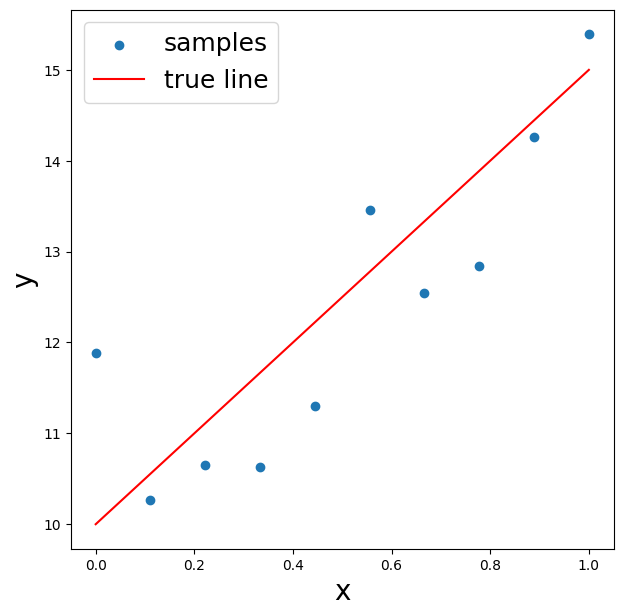

In [2]:
from matplotlib import pyplot as plt

plt.figure(figsize=(7,7))
p1 = plt.scatter(x_vals, y_vals)  # Plot noisy points
p2, = plt.plot(x_vals, true_y_vals, color='r')  # Plot the true line
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.legend((p1, p2), ('samples', 'true line'), fontsize=18)

<span style="color: #00008B;">**Estimating a Linear Model Using Least Squares**</span>

Lets estimate the relationship using linear regression. and calculate the residuals. We train a simple regression model using least squares, which minimizes the squared error between predictions and actual values.

In [3]:
from sklearn.linear_model import LinearRegression

lnReg = LinearRegression()
lnReg.fit(x_vals.reshape(-1,1), y_vals)  # Fit linear model
preds = lnReg.predict(x_vals.reshape(-1,1))  # Get predictions
resids = preds - y_vals  # Calculate residual errors

<span style="color: #00008B;">**Comparing True vs. Estimated Model**</span>

Our estimated slope and intercept will be close to the true values, but there will be some error. The residual standard deviation tells us how much variability remains unexplained.

In [4]:
print('True Model:')
print(f'y_true = {true_slope} * x + {true_intercept}')
print(f'True sigma: {true_sigma}\n')

print('Estimated Model:')
print(f'y_hat = {lnReg.coef_[0]} * x + {lnReg.intercept_}')
print(f'Sd Residuals: {resids.std()}')

mle_estimates = {'slope': lnReg.coef_[0], 'intercept': lnReg.intercept_, 'sigma': resids.std()}

True Model:
y_true = 5 * x + 10
True sigma: 1

Estimated Model:
y_hat = 4.2783322080589885 * x + 10.182983965515039
Sd Residuals: 0.8543998364364557


## Bayesian Linear Regression: A Probabilistic Approach

In Bayesian statistics, instead of estimating a single best-fit line, we assume a distribution of possible lines.

But why use Bayesian Regression?

- We don’t assume the parameters are fixed—we assume they follow a probability distribution.
- This allows us to quantify uncertainty in our predictions.

Lets do this using the `pycm3` library; 

<span style="color: #00008B;">**Define Priors (Initial Assumptions)**</span>

Here; 

- We assume prior beliefs about our parameters.
- Intercept & Slope → Normally distributed around 0 (uninformative prior).
- Sigma (noise) → Follows an Exponential distribution (ensuring it’s positive).

<span style="color: #00008B;">**Define Likelihood (How Data is Generated)**</span>

We assume that our observed data y is normally distributed around the predicted line($y = mx + c$) with some noise $\epsilon$

In [5]:
import pymc as pm

with pm.Model() as model:
    sigma = pm.Exponential("sigma", lam=1.0)  # Prior for standard deviation (positive)
    intercept = pm.Normal("intercept", mu=0, sigma=20)  # Prior for intercept
    slope = pm.Normal("slope", mu=0, sigma=20)  # Prior for slope
    
    likelihood = pm.Normal("y", mu=slope*x_vals + intercept, sigma=sigma, observed=y_vals)

    # Posterior sampling
    trace = pm.sample(1000, cores=4)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, intercept, slope]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.


From the code;
```python
trace = pm.sample(1000, cores=4)
```

1. PyMC3 draws 1000 samples from the posterior distribution using Markov Chain Monte Carlo (MCMC).
2. Instead of a single best-fit line, we get many plausible fits, weighted by probability.

Lets plot the posterior distributions; - We will find the distribution of the estimated slope, intercept and sigma. Unlike traditional regression, we get estimates(credible intervals)

<Figure size 700x700 with 0 Axes>

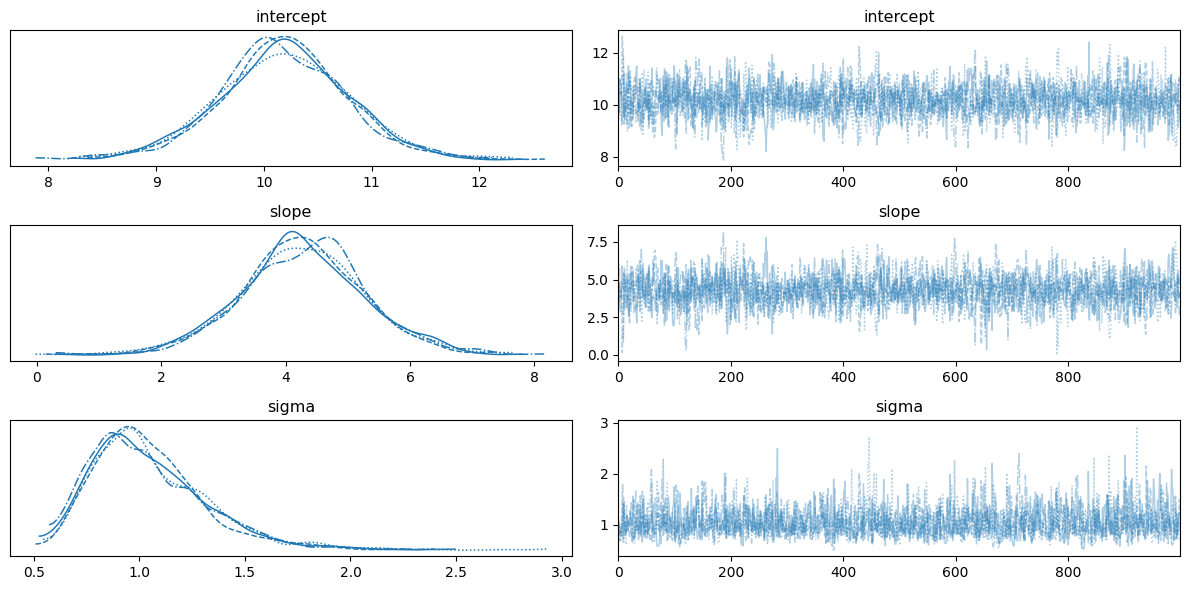

In [6]:
plt.figure(figsize=(7, 7))
pm.plot_trace(trace)  # Show posterior distributions
plt.tight_layout()

Now lets Compare the estimates to the true values 

/tmp/ipykernel_67450/4186489442.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vals)  # Plot posterior distribution


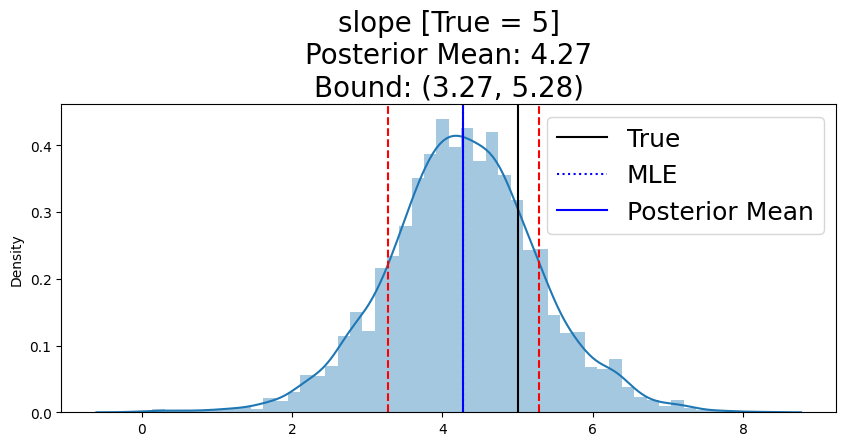

/tmp/ipykernel_67450/4186489442.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vals)  # Plot posterior distribution


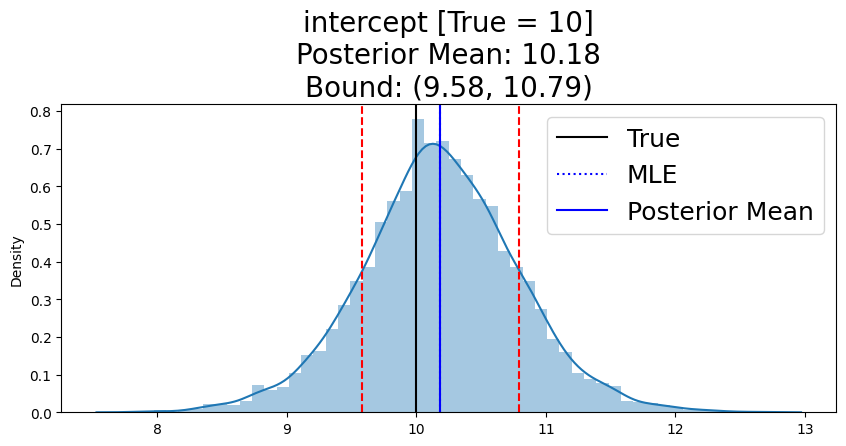

/tmp/ipykernel_67450/4186489442.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vals)  # Plot posterior distribution


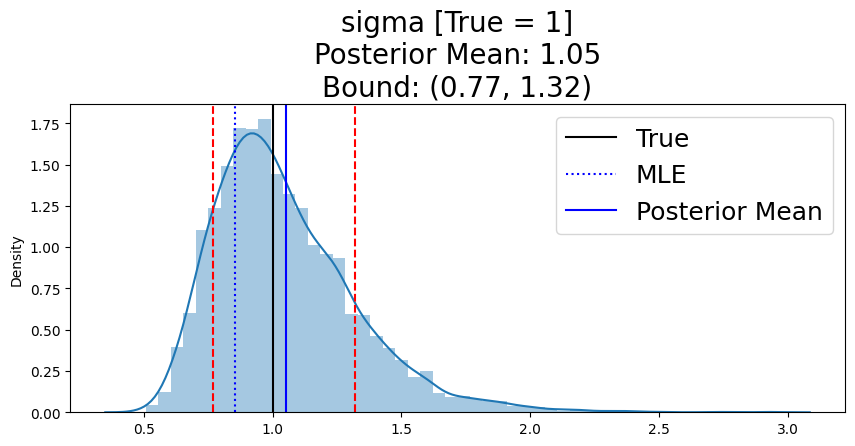

In [7]:
import seaborn as sns 

for var in ['slope', 'intercept', 'sigma']:
    plt.figure(figsize=(10,4))
    vals = trace.posterior[var].values.flatten()
    mean, lower, upper = round(vals.mean(),2), round(vals.mean()-vals.std(),2), round(vals.mean()+vals.std(),2)
    sns.distplot(vals)  # Plot posterior distribution
    posterior_est = plt.axvline(mean, color='b')  # Mean estimate
    mle_est = plt.axvline(mle_estimates[var], color='b', linestyle='dotted')  # MLE estimate
    plt.axvline(lower, color='r', linestyle='--')  # Lower bound
    plt.axvline(upper, color='r', linestyle='--')  # Upper bound
    plt.title(f'{var} [True = {true_params[var]}]\nPosterior Mean: {mean}\nBound: ({lower}, {upper})', fontsize=20)
    true_val = plt.axvline(true_params[var], color='k')  # True value
    
    plt.legend((true_val, mle_est, posterior_est), ('True', 'MLE', 'Posterior Mean'), fontsize=18)
    plt.show()


- The Bayesian approach gives us credible intervals around our estimates, helping us understand how uncertain we are.
- The posterior estimates tend to match the true values closely, but with a clear measure of confidence.